In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load data, Join dataframes, and clean data Q1, Q2


In [2]:
df1 = pd.read_csv('coal-consumption-by-country-terawatt-hours-twh.csv')
df1

,Entity,Code,Year,Coal Consumption - TWh
0,Africa,NaN,1965,323.496138
1,Africa,NaN,1966,323.122193
2,Africa,NaN,1967,330.291585
3,Africa,NaN,1968,343.512911
4,Africa,NaN,1969,346.642922
...,...,...,...,...
4998,World,OWID_WRL,2016,43501.654556
4999,World,OWID_WRL,2017,43721.381222
5000,World,OWID_WRL,2018,44238.975333
5001,World,OWID_WRL,2019,43788.651056


In [3]:
df2 = pd.read_csv('per-capita-co2-fuel.csv')
df2

,Entity,Code,Year,Annual CO2 emissions from oil (per capita),Annual CO2 emissions from flaring (per capita),Annual CO2 emissions from gas (per capita),Annual CO2 emissions from other industry (per capita),Annual CO2 emissions from cement (per capita),Annual CO2 emissions from coal (per capita)
0,Afghanistan,AFG,1950,0.0082,NaN,NaN,NaN,NaN,0.0027
1,Afghanistan,AFG,1951,0.0084,NaN,NaN,NaN,NaN,0.0033
2,Afghanistan,AFG,1952,0.0075,NaN,NaN,NaN,NaN,0.0040
3,Afghanistan,AFG,1953,0.0085,NaN,NaN,NaN,NaN,0.0047
4,Afghanistan,AFG,1954,0.0078,NaN,NaN,NaN,NaN,0.0052
...,...,...,...,...,...,...,...,...,...
23302,Zimbabwe,ZWE,1940,NaN,NaN,NaN,NaN,NaN,1.5206
23303,Zimbabwe,ZWE,1941,NaN,NaN,NaN,NaN,NaN,1.6302
23304,Zimbabwe,ZWE,1942,NaN,NaN,NaN,NaN,NaN,1.7682
23305,Zimbabwe,ZWE,1943,NaN,NaN,NaN,NaN,NaN,1.9775


In [4]:
df = pd.merge(df1[['Entity', 'Year','Coal Consumption - TWh']],
                 df2[['Entity', 'Year','Annual CO2 emissions from oil (per capita)','Annual CO2 emissions from flaring (per capita)','Annual CO2 emissions from gas (per capita)','Annual CO2 emissions from other industry (per capita)','Annual CO2 emissions from cement (per capita)','Annual CO2 emissions from coal (per capita)']],
                 on=['Entity', 'Year'])
df

,Entity,Year,Coal Consumption - TWh,Annual CO2 emissions from oil (per capita),Annual CO2 emissions from flaring (per capita),Annual CO2 emissions from gas (per capita),Annual CO2 emissions from other industry (per capita),Annual CO2 emissions from cement (per capita),Annual CO2 emissions from coal (per capita)
0,Africa,1965,323.496138,0.2404,0.0156,0.0067,NaN,0.0180,0.3943
1,Africa,1966,323.122193,0.2587,0.0160,0.0073,NaN,0.0180,0.3814
2,Africa,1967,330.291585,0.2436,0.0623,0.0070,NaN,0.0179,0.3817
3,Africa,1968,343.512911,0.2524,0.0869,0.0069,NaN,0.0201,0.3879
4,Africa,1969,346.642922,0.2678,0.1094,0.0082,NaN,0.0225,0.3858
...,...,...,...,...,...,...,...,...,...
4382,World,2016,43501.654556,1.6022,0.0519,0.9334,0.0400,0.1981,1.9239
4383,World,2017,43721.381222,1.6071,0.0560,0.9429,0.0399,0.1988,1.9149
4384,World,2018,44238.975333,1.5974,0.0540,0.9773,0.0395,0.2053,1.9287
4385,World,2019,43788.651056,1.5855,0.0563,0.9792,0.0393,0.2085,1.8893


In [5]:
df['Year'] = pd.to_datetime(df['Year'], format= '%Y')


In [6]:
df.columns= ['Entity','Year', 'CoalCons', 'OilEmiPC', 'flaringEmiPC','gasEmiPC','industryEmiPC','cementEmiPC','coalEmiPC']
df=df.set_index('Year', drop=True, append=False, inplace=False, verify_integrity=False)

In [7]:
df

,Entity,CoalCons,OilEmiPC,flaringEmiPC,gasEmiPC,industryEmiPC,cementEmiPC,coalEmiPC
Year,,,,,,,,
1965-01-01,Africa,323.496138,0.2404,0.0156,0.0067,NaN,0.0180,0.3943
1966-01-01,Africa,323.122193,0.2587,0.0160,0.0073,NaN,0.0180,0.3814
1967-01-01,Africa,330.291585,0.2436,0.0623,0.0070,NaN,0.0179,0.3817
1968-01-01,Africa,343.512911,0.2524,0.0869,0.0069,NaN,0.0201,0.3879
1969-01-01,Africa,346.642922,0.2678,0.1094,0.0082,NaN,0.0225,0.3858
...,...,...,...,...,...,...,...,...
2016-01-01,World,43501.654556,1.6022,0.0519,0.9334,0.0400,0.1981,1.9239
2017-01-01,World,43721.381222,1.6071,0.0560,0.9429,0.0399,0.1988,1.9149
2018-01-01,World,44238.975333,1.5974,0.0540,0.9773,0.0395,0.2053,1.9287


# Select countries to analyze Q3
Countries were selected randomly, But for the purpose of this notebook I will be looking at Estonia and Philippines

In [8]:
# I selected ra be randomly selected
toBeAnalyzed= df['Entity'].sample(2).tolist()
toBeAnalyzed

['Malaysia', 'Greece']

In [30]:
toBeAnalyzed=['Estonia', 'Philippines']

## For this analysis Estonia and Philippines were selected

In [31]:

df3=df[df['Entity']==toBeAnalyzed[0] ]
df4=df[df['Entity']==toBeAnalyzed[1] ]

In [32]:
df3

,Entity,CoalCons,OilEmiPC,flaringEmiPC,gasEmiPC,industryEmiPC,cementEmiPC,coalEmiPC
Year,,,,,,,,
1985-01-01,Estonia,67.520303,7.1774,0.0865,1.2322,NaN,0.2936,16.6714
1986-01-01,Estonia,68.341516,7.0086,0.0750,1.0402,NaN,0.3027,16.8079
1987-01-01,Estonia,68.931211,6.1446,0.0681,1.2263,NaN,0.3067,16.6626
1988-01-01,Estonia,65.754233,6.1890,0.1486,1.3265,NaN,0.3107,16.2674
1989-01-01,Estonia,68.070539,6.2821,0.1444,1.3006,NaN,0.3135,16.7174
1990-01-01,Estonia,64.798406,5.8313,0.0001,1.7383,0.0914,0.3086,16.0840
1991-01-01,Estonia,57.968537,5.3024,0.0001,1.7833,0.0996,0.3094,14.3518
1992-01-01,Estonia,50.655907,3.0446,0.0000,1.0565,0.0442,0.2074,11.6620
1993-01-01,Estonia,37.216872,3.2148,0.0000,0.5399,0.0137,0.1533,9.1178


In [33]:
df4

,Entity,CoalCons,OilEmiPC,flaringEmiPC,gasEmiPC,industryEmiPC,cementEmiPC,coalEmiPC
Year,,,,,,,,
1965-01-01,Philippines,0.515523,0.4225,NaN,NaN,NaN,0.0245,0.0049
1966-01-01,Philippines,0.488390,0.4762,NaN,NaN,NaN,0.0250,0.0043
1967-01-01,Philippines,0.379859,0.5197,NaN,NaN,NaN,0.0318,0.0032
1968-01-01,Philippines,0.173650,0.6174,NaN,NaN,NaN,0.0375,0.0026
1969-01-01,Philippines,0.227916,0.6122,NaN,NaN,NaN,0.0419,0.0022
1970-01-01,Philippines,0.227916,0.6552,NaN,NaN,NaN,0.0338,0.0024
1971-01-01,Philippines,0.222489,0.7038,NaN,NaN,NaN,0.0418,0.0021
1972-01-01,Philippines,0.217062,0.6565,NaN,NaN,NaN,0.0379,0.0020
1973-01-01,Philippines,0.217062,0.7542,NaN,NaN,NaN,0.0514,0.0016


# Q4

## Analyzing Estonia's emissions data
Since its peak in 1985 based on the data, there has been a sharp decline in the country's emissions per capita from coal amd oil then somewhat remaining steady into the 2010s
Wmissions from gas been a gentle decline over the same period, 
while emissions from flarring, Industry, cement has been hovering around 0, indicating that the industries may not be robust

Text(0.5, 1.0, 'Estonia')

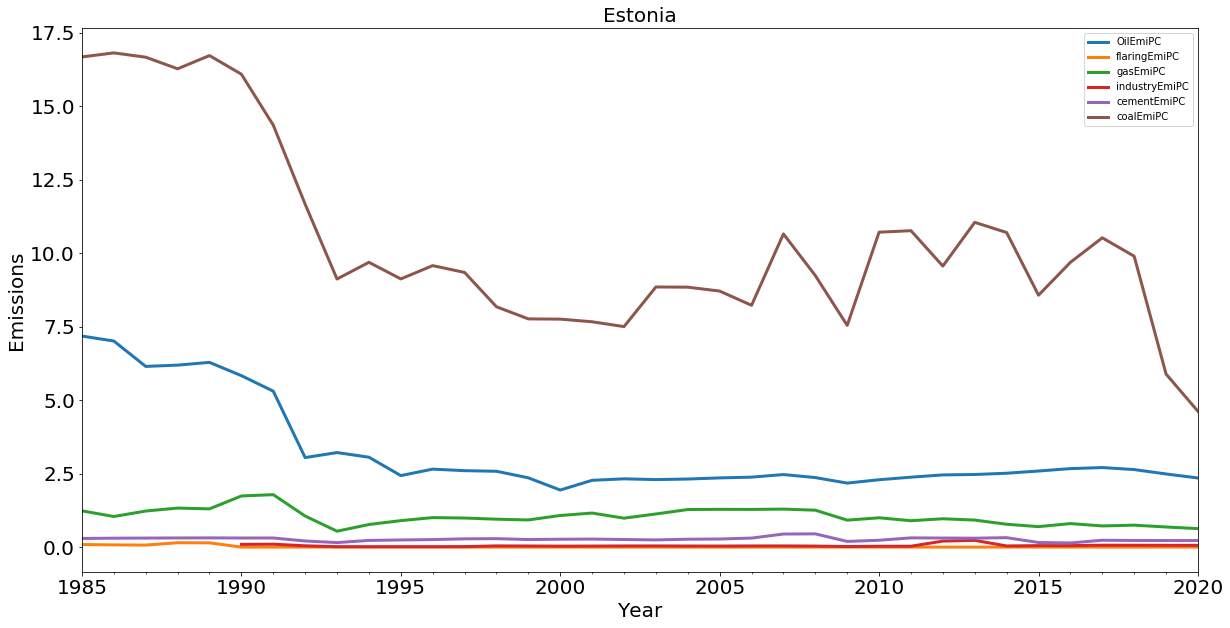

In [34]:
df3[[ 'OilEmiPC', 'flaringEmiPC','gasEmiPC','industryEmiPC','cementEmiPC','coalEmiPC']].plot(figsize=(20,10), linewidth=3, fontsize=20, label=toBeAnalyzed[0])
plt.xlabel('Year', fontsize=20);
plt.ylabel('Emissions', fontsize=20);
plt.title(toBeAnalyzed[0],fontsize=20)

## Analyzing Philippines's emissions data
Emissions from oil was at a peak when emissions from coal were low and as emissions from coal steadily started to rise, it would apear there is some correlation
emissions per capita from other sources appear to be steady and experience little change

Text(0.5, 1.0, 'Philippines')

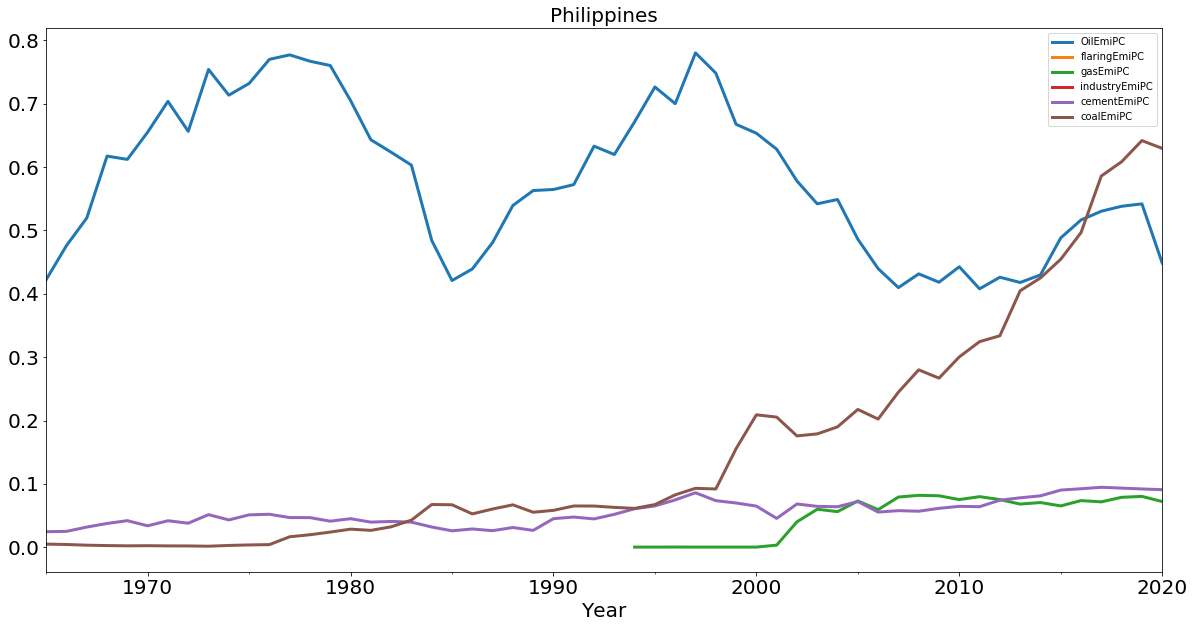

In [35]:
df4[[ 'OilEmiPC', 'flaringEmiPC','gasEmiPC','industryEmiPC','cementEmiPC','coalEmiPC']].plot(figsize=(20,10), linewidth=3, fontsize=20, label=toBeAnalyzed[0])
plt.xlabel('Year', fontsize=20);
plt.title(toBeAnalyzed[1],fontsize=20)

# Q5

In [36]:
OilEmiPC = df3[['OilEmiPC']]
OilEmiPC['OilEmiPC'] = OilEmiPC['OilEmiPC'].astype(np.float64)
train = OilEmiPC[OilEmiPC.index.year < 2015]
test = OilEmiPC[OilEmiPC.index.year >= 2015]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


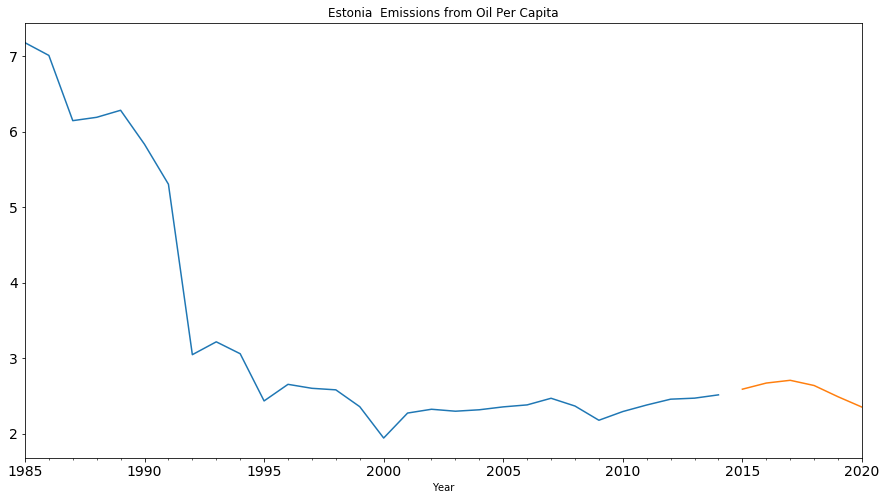

In [37]:
train.OilEmiPC.plot(figsize=(15,8), title= 'Estonia Emissions from Oil Per Capita', fontsize=14)
test.OilEmiPC.plot(figsize=(15,8), title= 'Estonia  Emissions from Oil Per Capita', fontsize=14)
plt.show()

In [38]:
OilEmiPC1 = df4[['OilEmiPC']]
OilEmiPC1['OilEmiPC'] = OilEmiPC1['OilEmiPC'].astype(np.float64)
train1 = OilEmiPC1[OilEmiPC1.index.year < 2015]
test1 = OilEmiPC1[OilEmiPC1.index.year >= 2015]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


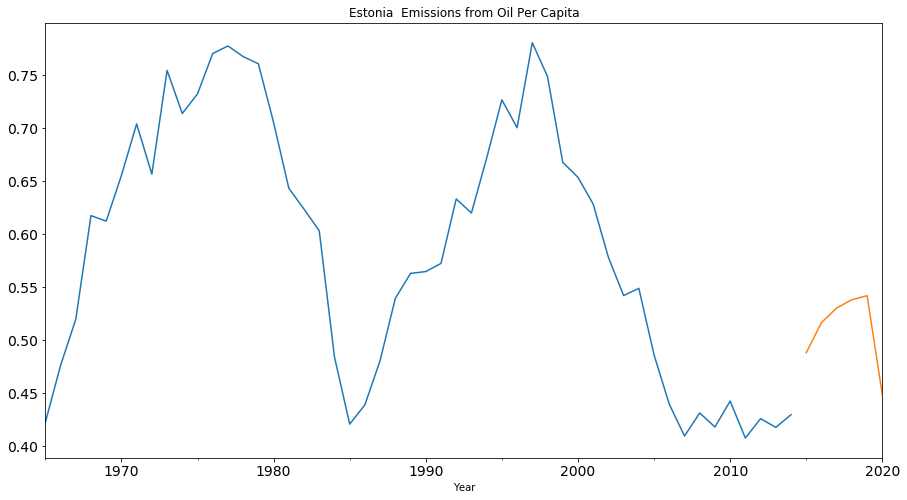

In [39]:
train1.OilEmiPC.plot(figsize=(15,8), title= 'Estonia Emissions from Oil Per Capita', fontsize=14)
test1.OilEmiPC.plot(figsize=(15,8), title= 'Estonia  Emissions from Oil Per Capita', fontsize=14)
plt.show()

2.4346951849934557 2.5874
0.09069888519333492


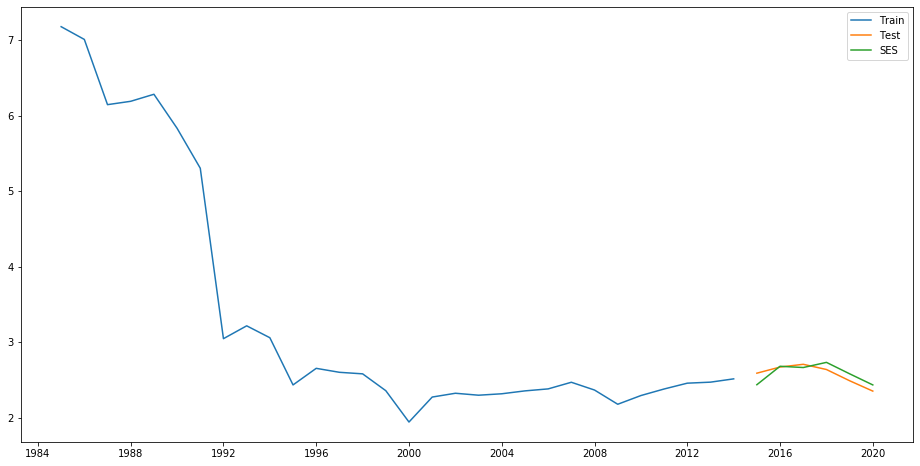

In [57]:
y_hat_avg = test.copy()

pred = []
#s =
a = 1.6
ft = pd.DataFrame.ewm(train, span = 10).mean()['OilEmiPC'].iloc[-1]
pred.append(ft)
print(ft, test['OilEmiPC'][0])
for i in range(1,len(test['OilEmiPC'])):
    dt = test['OilEmiPC'][i-1]
    ft_plus_1 = a*dt + (1-a)*ft;
    pred.append(ft_plus_1)
    ft = ft_plus_1
y_hat_avg['SES'] = pd.Series(pred).values

rms = sqrt(mean_squared_error(test.OilEmiPC, y_hat_avg.SES))
print(rms)

plt.figure(figsize=(16,8))
plt.plot(train['OilEmiPC'], label='Train')
plt.plot(test['OilEmiPC'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

2.4346951849934557 2.5874
0.09069888519333492


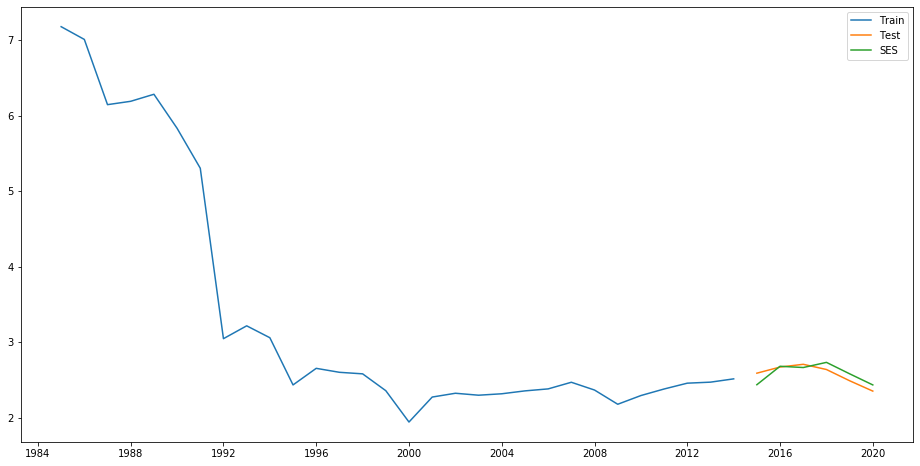

In [51]:
y_hat_avg = test.copy()

pred = []
#s =
a = 1.6
ft = pd.DataFrame.ewm(train, span = 10).mean()['OilEmiPC'].iloc[-1]
pred.append(ft)
print(ft, test['OilEmiPC'][0])
for i in range(1,len(test['OilEmiPC'])):
    dt = test['OilEmiPC'][i-1]
    ft_plus_1 = a*dt + (1-a)*ft;
    pred.append(ft_plus_1)
    ft = ft_plus_1
y_hat_avg['SES'] = pd.Series(pred).values

rms = sqrt(mean_squared_error(test.OilEmiPC, y_hat_avg.SES))
print(rms)

plt.figure(figsize=(16,8))
plt.plot(train['OilEmiPC'], label='Train')
plt.plot(test['OilEmiPC'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

# The alpha that gives the lowest RMS is 1.6

# Q6  Emissions from coal was selected because I assume that coal consumption and emissions from coal are correlated

## It appears that as coal consumption increases, or decreases the emissions follow suite, consumption is jus a higher magnitude

In [60]:
from sklearn.preprocessing import StandardScaler

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Estonia')

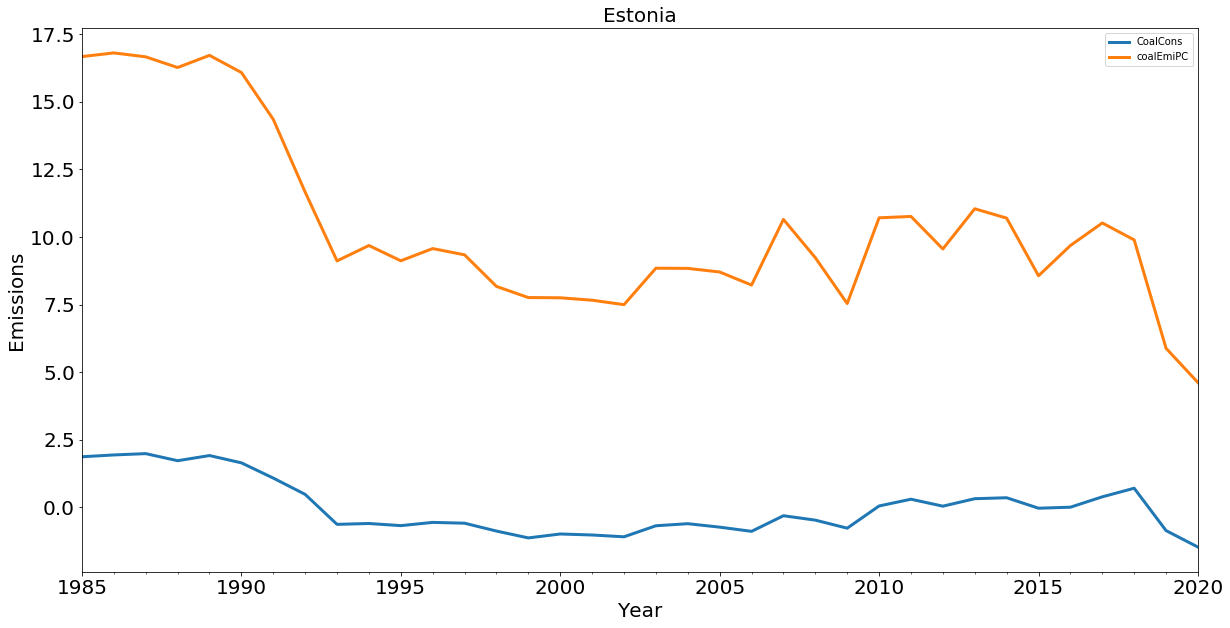

In [61]:
df3[ 'CoalCons']=StandardScaler().fit_transform(df3['CoalCons'].values.reshape(-1, 1))
df3[[ 'CoalCons', 'coalEmiPC']].plot(figsize=(20,10), linewidth=3, fontsize=20, label=toBeAnalyzed[0])
plt.xlabel('Year', fontsize=20);
plt.ylabel('Emissions', fontsize=20);
plt.title(toBeAnalyzed[0],fontsize=20)

# the correlation between consumption and emissions is apparent after normalising the the consumption data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Philippines')

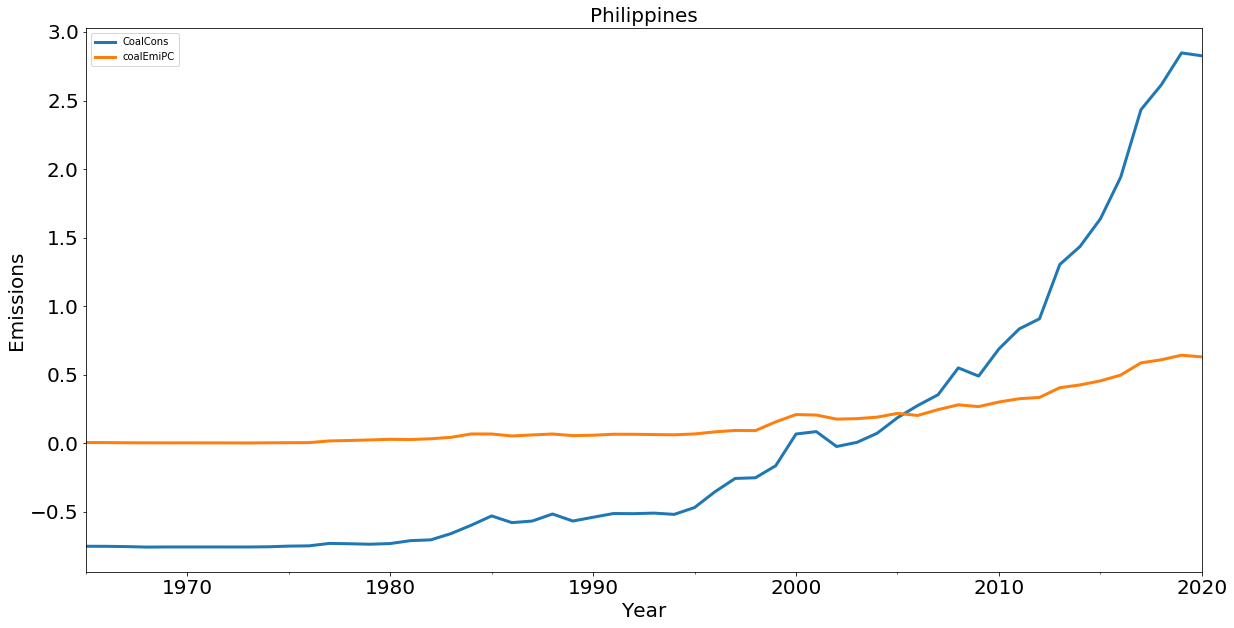

In [63]:
df4[ 'CoalCons']=StandardScaler().fit_transform(df4['CoalCons'].values.reshape(-1, 1))
df4[[ 'CoalCons', 'coalEmiPC']].plot(figsize=(20,10), linewidth=3, fontsize=20, label=toBeAnalyzed[0])
plt.xlabel('Year', fontsize=20);
plt.ylabel('Emissions', fontsize=20);
plt.title(toBeAnalyzed[1],fontsize=20)